In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import datetime
%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
drift_dir='/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/'
drifter_files = glob.glob(os.path.join(drift_dir, '*/*.nc'))
drifter_files.sort()
drifter_files

['/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2509004_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2510399_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2510584_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2510711_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2510711_2.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2513617_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2514842_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2514845_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean/netcdf/201404/2515044_1.nc',
 '/home/soontiensn/data/gpsc-work/OPP/drifters/ios_drifters/all/SCT_clean

In [3]:
def plot_drifter(bmap, lat, lon):
    x, y = bmap(lon, lat)
    bmap.plot(x,y,'r-')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


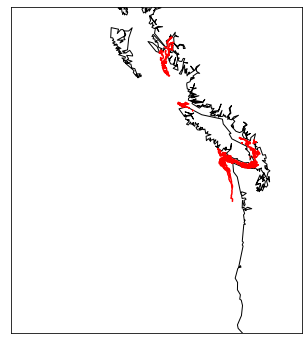

In [4]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=55,llcrnrlon=-140,urcrnrlon=-120,resolution='l')
year=2016
d1=datetime.datetime(year,1,1)
d2=datetime.datetime(year,12,31)
count=0
for f in drifter_files:
    d = xr.open_dataset(f)
    dnew = d.sel(time=slice(d1,d2))
    lats = dnew.latitude.values
    lons = dnew.longitude.values
    if lons.size:
        count+=1
    plot_drifter(m, lats, lons)
m.drawcoastlines()

In [5]:
print(count)

71
